In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [134]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     plt.show()
    return img

In [135]:
filename = "dog.jpeg"
img = read_file(filename)
plt.imshow(img)
plt.

# Create Edge Mask

In [104]:
def edge_mask(img, line_size, blur_value):
    """
    Input: Input Image
    Output: Edges of Images
     
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,line_size, blur_value)
    return edges

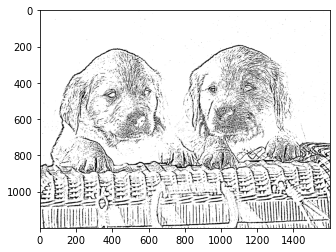

In [133]:
line_size, blur_value = 7,3
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap="gray")
plt.show()

# Reduce the Color Palette

In [106]:
def color_quantization(img, k):
    #transform the image
    data = np.float32(img).reshape((-1, 3))
    
    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    #Implementing K-Means
    ret, label, centre = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centre = np.uint8(centre)
    
    result = centre[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

In [115]:
img_quantiz = color_quantization(img, k=5)


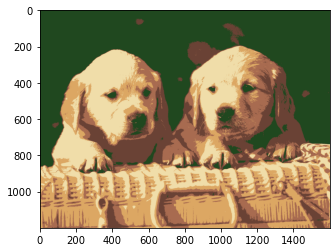

In [116]:
plt.imshow(img_quantiz)
plt.show()

# Reduced the noise

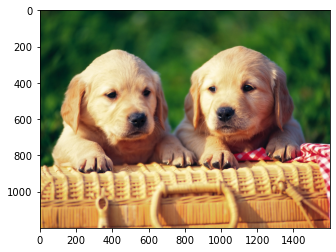

In [117]:
#Reduced the noise
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)

plt.imshow(img)
plt.show()

In [131]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    org_img = read_file("dog.jpeg")
    
    plt.imshow(c)
    plt.title("Cartoonified Image");
    plt.show()
    
    plt.imshow(org_img)
    plt.title("org_img")
    plt.show()

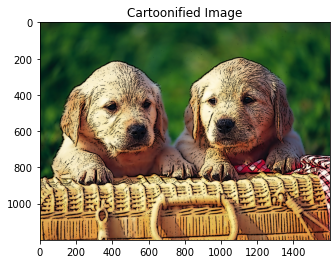

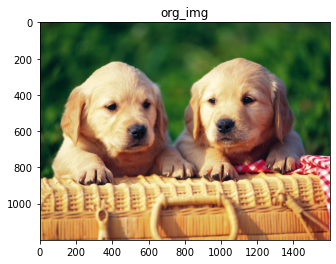

In [132]:
cartoon()
